In [1]:
import gzip
import urllib
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

np.set_printoptions(edgeitems=np.inf)

In [2]:
import urllib
import os
if not os.path.isfile('../data/8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","../data/8_faces_train_and_valid.hdf5")
!ls -l ../data/8_faces_train_and_valid.hdf5

-rw-r--r-- 1 henning henning 132733792 Dez 29 12:41 ../data/8_faces_train_and_valid.hdf5


In [3]:
import h5py
h5f_X = h5py.File('../data/8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'][()]
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'][()]
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'][()]
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'][()]
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


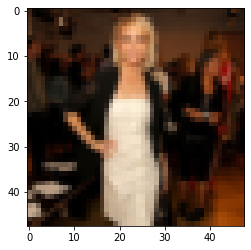

In [4]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
classes = ["Miranda Cosgrove", "Chris Martin", "Emma Stone", "Jamie Foxx", 
           "Steve Jobs", "Zac Efron", "Sandra Oh", "Taryn Manning"]
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n), (250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0], dtype="uint8"))

In [5]:
#Downloading the data, if it does not exist
if not os.path.isfile('../data/8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","../data/8_faces_test.hdf5")
h5f_X = h5py.File('../data/8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'][()]
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'][()]
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [6]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

## a)

In [7]:
n_epochs = 100
batch_size = 8
lr = 1e-3
model = Sequential()
model.add(Conv2D(15, kernel_size=3, strides=1, input_shape=(48, 48, 3), padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Conv2D(15, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

model.add(Conv2D(30, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Conv2D(30, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=4, strides=4))

model.add(Flatten())
model.add(Dense(300, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.25))
model.add(Dense(8, activation="softmax"))

model.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 15)        420       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 15)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 30)        0

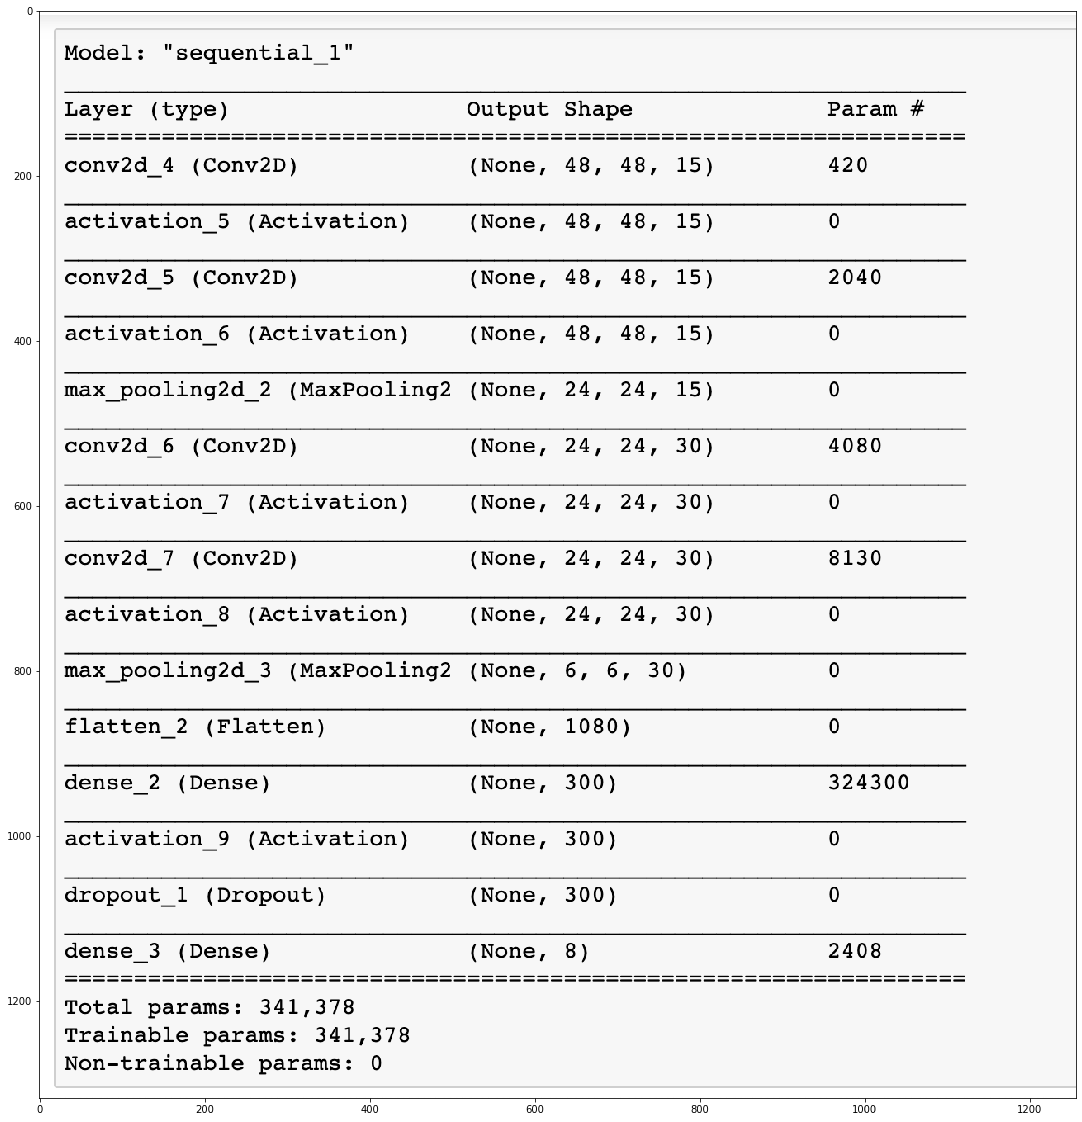

In [8]:
img = plt.imread("https://raw.githubusercontent.com/ioskn/mldl_htwg/master/uebungen/dl_cnn_faces_net.png")
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

In [9]:
x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

history = model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/100
2000/2000 [==============================] - 9s 4ms/sample - loss: 2.7399 - accuracy: 0.1915 - val_loss: 2.0064 - val_accuracy: 0.2800
Epoch 2/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.9661 - accuracy: 0.2785 - val_loss: 1.9437 - val_accuracy: 0.3100
Epoch 3/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.8399 - accuracy: 0.3530 - val_loss: 1.7981 - val_accuracy: 0.3575
Epoch 4/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.7979 - accuracy: 0.3690 - val_loss: 1.8867 - val_accuracy: 0.3525
Epoch 5/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.7448 - accuracy: 0.4030 - val_loss: 1.8447 - val_accuracy: 0.3650
Epoch 6/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.6982 - accuracy: 0.4140 - val_loss: 1.7401 - val_accuracy: 0.4150
Epoch 7/100
2000/2000 [==============================] - 8s 4ms/sample 

2000/2000 [==============================] - 8s 4ms/sample - loss: 1.0634 - accuracy: 0.8050 - val_loss: 2.4600 - val_accuracy: 0.4975
Epoch 57/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 0.9957 - accuracy: 0.8125 - val_loss: 2.4175 - val_accuracy: 0.5125
Epoch 58/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.0081 - accuracy: 0.8135 - val_loss: 2.4527 - val_accuracy: 0.4875
Epoch 59/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.0560 - accuracy: 0.8000 - val_loss: 2.3578 - val_accuracy: 0.5000
Epoch 60/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 0.9986 - accuracy: 0.8200 - val_loss: 2.2704 - val_accuracy: 0.4975
Epoch 61/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 1.0062 - accuracy: 0.8095 - val_loss: 2.2180 - val_accuracy: 0.5200
Epoch 62/100
2000/2000 [==============================] - 8s 4ms/sample - loss: 0.9679 - accuracy: 0.8360 - val_loss: 2.5887 

In [10]:
score_train = model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.7096937494277954
Accuracy train set: 0.9449999928474426

Loss validation set: 2.6292971706390382
Accuracy validation set: 0.45249998569488525



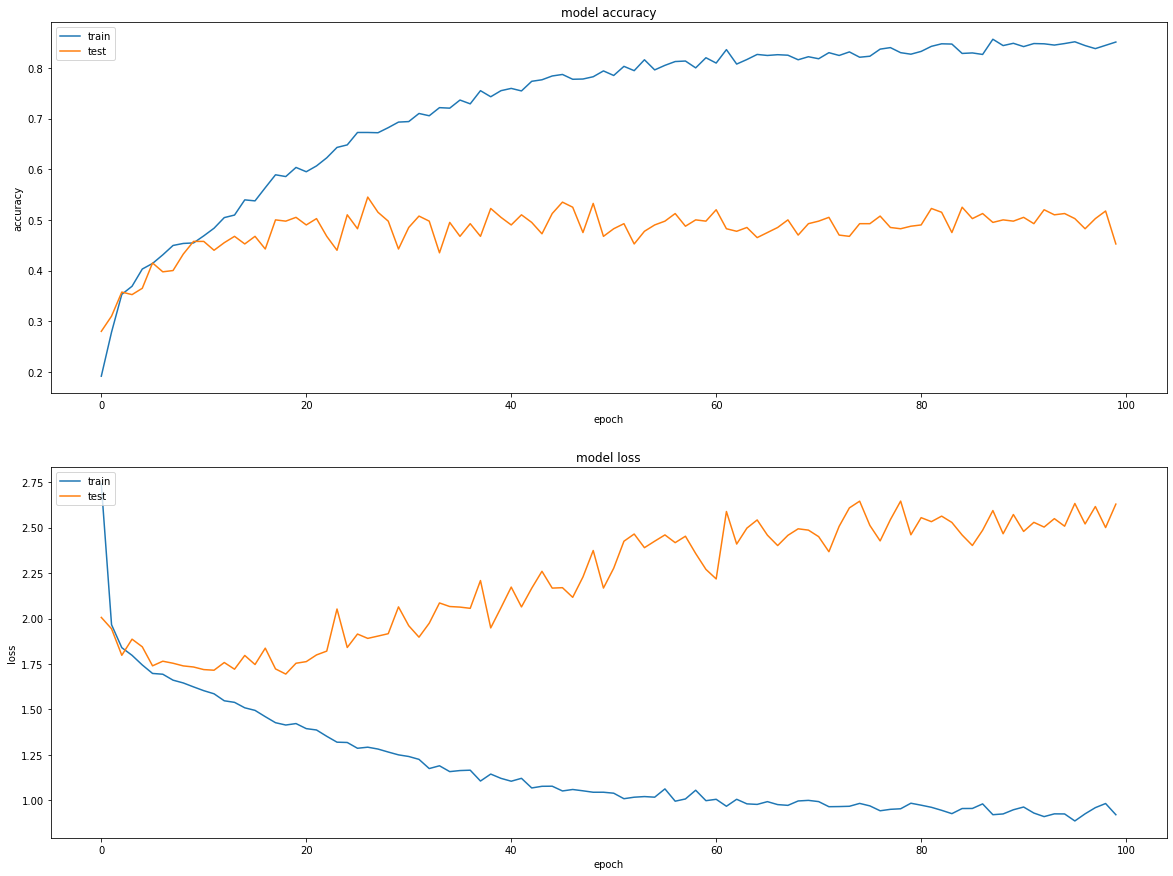

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [12]:
y_pred = model.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[32  1  3  2  0  3  4  5]
 [ 3 15  3  8  2 11  3  5]
 [ 2  2 26  2  0  3  2 13]
 [ 4  4  1 24  0  7  3  7]
 [ 1 14  2  5 23  2  1  2]
 [ 3  6  4  7  2 22  4  2]
 [ 9  3  4  5  1  4 20  4]
 [ 7  5  4  5  2  8  0 19]]


In [13]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.52      0.64      0.58        50
    Chris Martin       0.30      0.30      0.30        50
      Emma Stone       0.55      0.52      0.54        50
      Jamie Foxx       0.41      0.48      0.44        50
      Steve Jobs       0.77      0.46      0.57        50
       Zac Efron       0.37      0.44      0.40        50
       Sandra Oh       0.54      0.40      0.46        50
   Taryn Manning       0.33      0.38      0.36        50

        accuracy                           0.45       400
       macro avg       0.47      0.45      0.46       400
    weighted avg       0.47      0.45      0.46       400



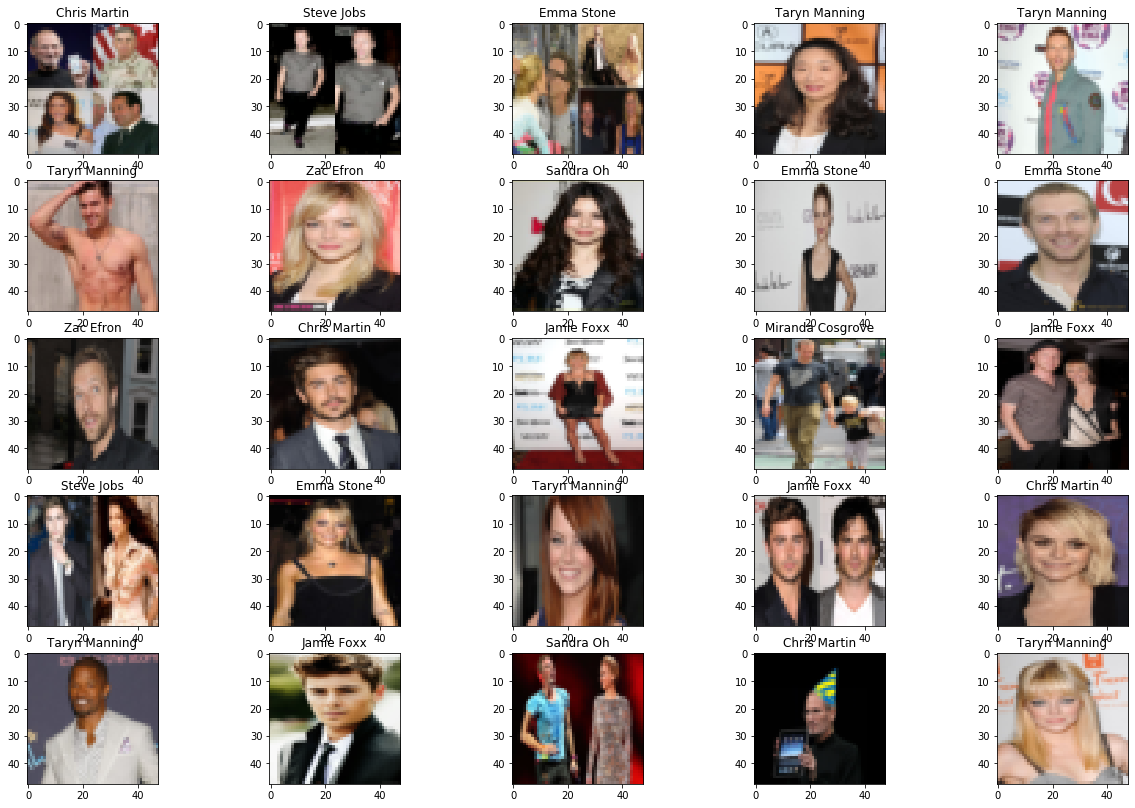

In [14]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1

## b)

In [15]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [16]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512, activation='softmax', name='my_dense1')(fc1)
fc2 = Dense(512, activation='softmax', name='my_dense2')(fc1)
fc3 = Dense(100, activation='softmax', name='my_dense3')(fc2)
fc4 = Dense(8, activation='softmax', name='my_dense4')(fc3)

model_trans = tf.compat.v1.keras.Model(base_model.input, fc4)
model_trans.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [17]:
for layer in model_trans.layers:
    if layer.name.startswith('my_dense'):
        layer.trainable = True
        print(f"Set {layer.name} to trainable.")
    else:
        layer.trainable = False
print()
model_trans.summary()

Set my_dense1 to trainable.
Set my_dense2 to trainable.
Set my_dense3 to trainable.
Set my_dense4 to trainable.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________

In [18]:
n_epochs = 100
batch_size = 8
lr = 1e-3

x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

model_trans.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
history = model_trans.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/100
2000/2000 [==============================] - 35s 18ms/sample - loss: 2.0803 - accuracy: 0.1230 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/100
2000/2000 [==============================] - 35s 17ms/sample - loss: 2.0802 - accuracy: 0.1065 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 2.0803 - accuracy: 0.1065 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/100
2000/2000 [==============================] - 37s 18ms/sample - loss: 2.0803 - accuracy: 0.1015 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 5/100
2000/2000 [==============================] - 36s 18ms/sample - loss: 2.0802 - accuracy: 0.1130 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 6/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 2.0803 - accuracy: 0.1040 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/100
2000/2000 [==============================] - 34

2000/2000 [==============================] - 35s 17ms/sample - loss: 1.0447 - accuracy: 0.6065 - val_loss: 1.9199 - val_accuracy: 0.3550
Epoch 56/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 1.0250 - accuracy: 0.6230 - val_loss: 1.9605 - val_accuracy: 0.3600
Epoch 57/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 1.0087 - accuracy: 0.6315 - val_loss: 1.9613 - val_accuracy: 0.3550
Epoch 58/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 0.9920 - accuracy: 0.6370 - val_loss: 1.9886 - val_accuracy: 0.3675
Epoch 59/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 0.9795 - accuracy: 0.6295 - val_loss: 1.9977 - val_accuracy: 0.3650
Epoch 60/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 0.9672 - accuracy: 0.6530 - val_loss: 2.0191 - val_accuracy: 0.3625
Epoch 61/100
2000/2000 [==============================] - 34s 17ms/sample - loss: 0.9434 - accuracy: 0.6680 - val

In [19]:
score_train = model_trans.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = model_trans.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

Loss train set: 0.571938362121582
Accuracy train set: 0.8034999966621399

Loss validation set: 2.466461391448975
Accuracy validation set: 0.38749998807907104



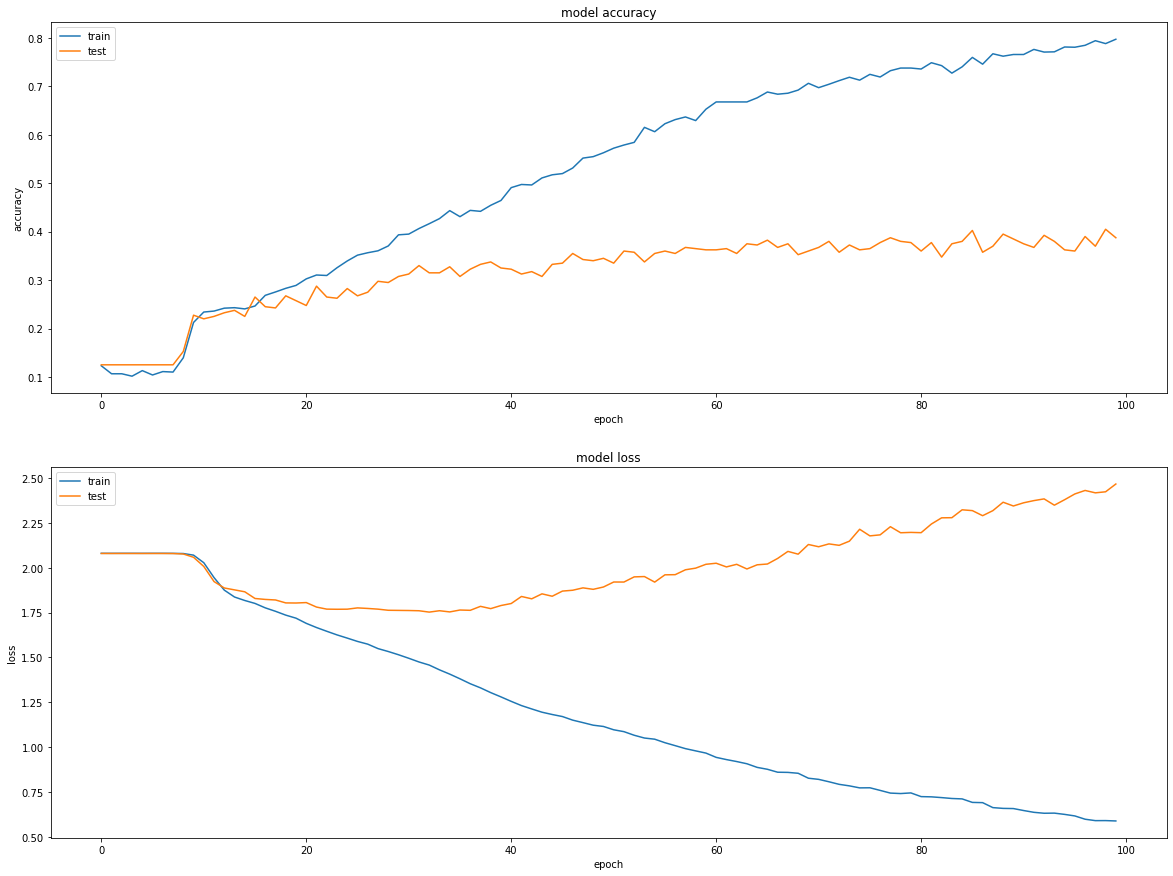

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [21]:
y_pred = model_trans.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

Confusion matrix
[[30  2  1  1  1  3  5  7]
 [ 3 16  1  7  4 11  3  5]
 [27  4  6  3  0  2  2  6]
 [ 2  7  2 14 16  3  4  2]
 [ 0  5  0  7 34  1  1  2]
 [ 1  4  1  2  2 26 10  4]
 [ 6  5  3  0  3  8 17  8]
 [10  5  7  3  0  4  9 12]]


In [22]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

Classification Report
                  precision    recall  f1-score   support

Miranda Cosgrove       0.38      0.60      0.47        50
    Chris Martin       0.33      0.32      0.33        50
      Emma Stone       0.29      0.12      0.17        50
      Jamie Foxx       0.38      0.28      0.32        50
      Steve Jobs       0.57      0.68      0.62        50
       Zac Efron       0.45      0.52      0.48        50
       Sandra Oh       0.33      0.34      0.34        50
   Taryn Manning       0.26      0.24      0.25        50

        accuracy                           0.39       400
       macro avg       0.37      0.39      0.37       400
    weighted avg       0.37      0.39      0.37       400



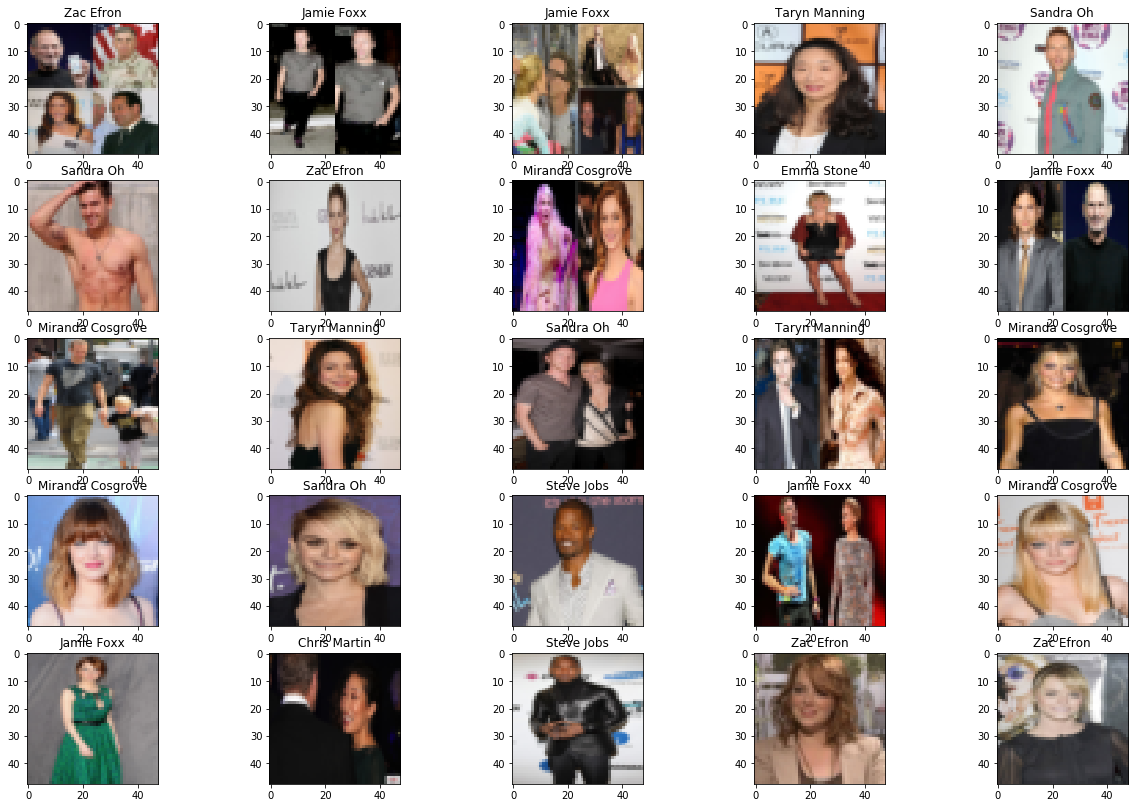

In [23]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1

## c)

In [24]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [25]:
pattern1 = re.compile("block[1-2]_conv2")
pattern2 = re.compile("block[3-5]_conv3")
new_model = Sequential()

dropout1 = 0.5
dropout2 = 0.25
dropout3 = 0.1
count1 = 1
count2 = 1
count3 = 1

for layer in base_model.layers:
    layer.trainable = False
    new_model.add(layer)
    
    if re.match(pattern1, layer.name):
        new_layer = Dropout(dropout1, name=f"dropout{count1}_{dropout1}")
        new_layer.trainable = True
        new_model.add(new_layer)
        count1 += 1
        
    if re.match(pattern2, layer.name):
        new_layer = Dropout(dropout2, name=f"dropout{count2}_{dropout2}")
        new_layer.trainable = True
        new_model.add(new_layer)
        count2 += 1

new_model.add(Flatten())
new_model.add(Dense(512, activation='softmax', name='my_dense1', trainable=True))        
new_model.add(Dropout(dropout3, name=f"dropout{1}_{dropout3}"))
new_model.add(Dense(512, activation='softmax', name='my_dense2', trainable=True))        
new_model.add(Dropout(dropout3, name=f"dropout{2}_{dropout3}"))
new_model.add(Dense(100, activation='softmax', name='my_dense3', trainable=True)) 
new_model.add(Dropout(dropout3, name=f"dropout{3}_{dropout3}"))
new_model.add(Dense(8, activation='softmax', name='my_dense4', trainable=True)) 

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
dropout1_0.5 (Dropout)       (None, 48, 48, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
dropout2_0.5 (Dropout)       (None, 24, 24, 128)      

In [ ]:
n_epochs = 100
batch_size = 8
lr = 1e-3

x0 = X_train
y0 = to_categorical(Y_train)

x2 = X_valid
y2 = to_categorical(Y_valid)

new_model.compile(optimizer="adam", loss='categorical_crossentropy', lr=lr, metrics=['accuracy'])
history = new_model.fit(x0, y0, batch_size=batch_size, epochs=n_epochs, validation_data=(x2, y2));

Train on 2000 samples, validate on 400 samples
Epoch 1/100
2000/2000 [==============================] - 38s 19ms/sample - loss: 2.0803 - accuracy: 0.1110 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/100
2000/2000 [==============================] - 39s 19ms/sample - loss: 2.0804 - accuracy: 0.1210 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/100
2000/2000 [==============================] - 38s 19ms/sample - loss: 2.0804 - accuracy: 0.1085 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 4/100
2000/2000 [==============================] - 38s 19ms/sample - loss: 2.0800 - accuracy: 0.1145 - val_loss: 2.0792 - val_accuracy: 0.1250
Epoch 5/100
2000/2000 [==============================] - 38s 19ms/sample - loss: 2.0793 - accuracy: 0.1315 - val_loss: 2.0784 - val_accuracy: 0.1250
Epoch 6/100
2000/2000 [==============================] - 39s 19ms/sample - loss: 2.0757 - accuracy: 0.1630 - val_loss: 2.0740 - val_accuracy: 0.1925
Epoch 7/100
2000/2000 [==============================] - 37

In [ ]:
score_train = new_model.evaluate(x0, y0, verbose=0)
print("Loss train set: {}".format(score_train[0]))
print("Accuracy train set: {}".format(score_train[1]))
print()
score_val = new_model.evaluate(x2, y2, verbose=0)
print("Loss validation set: {}".format(score_val[0]))
print("Accuracy validation set: {}".format(score_val[1]))
print()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left');

In [ ]:
y_pred = new_model.predict(x2).argmax(axis=1)
y2_tmp = y2.argmax(axis=1)
matrix = confusion_matrix(y2_tmp, y_pred)
print('Confusion matrix')
print(matrix)

In [ ]:
print('Classification Report')
print(classification_report(y2_tmp, y_pred, target_names=classes))

In [ ]:
indices = (~(y_pred == y2_tmp)).nonzero()[0]
count = 0
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols, figsize=(21, 14))
for i in range(nrows):
    for j in range(nrows):
        img = x2[indices[count]]
        axes[i, j].imshow(img)
        axes[i, j].set_title(classes[y_pred[indices[count]]])
        count += 1